In [118]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time
import urllib.request as req

In [119]:
chrome_loc = 'C:/chrome/chromedriver.exe'
driver = webdriver.Chrome(chrome_loc)
driver.get('https://www.koreagoldx.co.kr/main/html.php?agencyCode=&htmid=goods/gold_list.html')

In [120]:
total_button = '#contents > div.sub_content > div > div.service_cont > div.clear > ul.graph_dt_buttons > li:nth-child(6) > label'
driver.find_element_by_css_selector(total_button).click()
time.sleep(3)

In [121]:
gold_html = driver.page_source
gold = BeautifulSoup(gold_html, 'html.parser')

In [123]:
gold_price = []
for i in range(269):
    for j in range(int(len(gold.select('div.tabulator-cell'))/5)):
        date = gold.select('div.tabulator-cell')[j*5 + 0].text
        b_pure = gold.select('div.tabulator-cell')[j*5 + 1].text
        s_pure = gold.select('div.tabulator-cell')[j*5 + 2].text
        s_18k = gold.select('div.tabulator-cell')[j*5 + 3].text
        s_14k = gold.select('div.tabulator-cell')[j*5 + 4].text
        gold_price.append([date, b_pure, s_pure, s_18k, s_14k])
    nextpage = driver.find_element_by_css_selector("#example-table > div.tabulator-footer > span > button:nth-child(4)") 
    nextpage.click()
    gold_html = driver.page_source
    gold = BeautifulSoup(gold_html, 'html.parser')

In [124]:
gold_price = pd.DataFrame(gold_price)
gold_price.columns = ['date', 'buy_pure', 'sell_pure', 'sell_18k', 'sell_14k']   ## column 지정

In [125]:
gold_price

,date,buy_pure,sell_pure,sell_18k,sell_14k
0,2021.06.09,"294,000","274,000","197,300","152,100"
1,2021.06.08,"293,000","274,000","197,300","152,100"
2,2021.06.07,"292,000","273,500","197,000","151,800"
3,2021.06.05,"292,000","274,000","197,300","152,100"
4,2021.06.04,"291,000","273,000","196,600","151,600"
...,...,...,...,...,...
4023,2008.03.17,"138,050","107,500","88,687","69,359"
4024,2008.03.15,"133,650","106,000","87,450","68,391"
4025,2008.03.14,"130,020","102,000","84,150","65,810"
4026,2008.03.13,"128,370","100,500","82,912","64,842"


In [126]:
## 콤마 빼기
for i in range(gold_price['date'].size):
    gold_price['date'].values[i] = gold_price['date'].values[i].replace('.', '-')
    gold_price['buy_pure'].values[i] = gold_price['buy_pure'].values[i].replace(',','')
    gold_price['sell_pure'].values[i] = gold_price['sell_pure'].values[i].replace(',','')
    gold_price['sell_18k'].values[i] = gold_price['sell_18k'].values[i].replace(',','')
    gold_price['sell_14k'].values[i] = gold_price['sell_14k'].values[i].replace(',','')

In [127]:
## 데이터타입 변경
gold_price['buy_pure'] = gold_price['buy_pure'].astype(int)
gold_price['sell_pure'] = gold_price['sell_pure'].astype(int)
gold_price['sell_18k'] = gold_price['sell_18k'].astype(int)
gold_price['sell_14k'] = gold_price['sell_14k'].astype(int)

# 날짜 정렬
gold_price = gold_price.sort_values(by = 'date', ascending = True)

Text(0, 0.5, 'won')

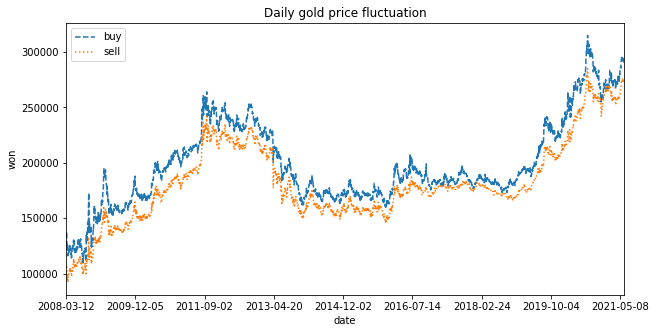

In [160]:
import matplotlib.pyplot as plt
ax = gold_price.plot('date','buy_pure',figsize = (10,5), ls = '--', label = 'buy')
gold_price.plot('date','sell_pure', ax=ax, ls = ':', label = 'sell')
plt.title('Daily gold price fluctuation')
plt.ylabel('won')